In [1]:
import pandas as pd
import networkx as nx
import plotly.express as px
import matplotlib.pyplot as plt


In [2]:
import linkpred
import tikzplotlib

In [3]:

edgeList = pd.read_csv('data/booksellers-edge.csv')

# Graph object creation

In [4]:
g = nx.from_pandas_edgelist(edgeList, 'Source', 'Target', ['Weight'])

# Link prediction

## 1st approach: Neighborhood measures

### 1. Common Neighborhood

In [5]:
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges())

In [6]:
cn_results = cn.predict()

top_cn = cn_results.top(5)
for edge, score in top_cn.items():
    print(edge, score)

313 - 13 140.0
459 - 15 131.0
417 - 246 131.0
506 - 173 126.0
259 - 37 125.0


### 2. Jaccard

In [7]:
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())


In [8]:
jc_results = jc.predict()

top_jc = jc_results.top(5)
for edge, score in top_jc.items():
    print(edge, score)

463 - 195 1.0
463 - 9 0.5
446 - 161 0.5
288 - 163 0.5
195 - 9 0.5


## 2nd approach: Ranking

### 1. SimRank

In [9]:
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())


In [10]:
simrank_results = simrank.predict(c=0.5)

top_sr = simrank_results.top(5)
for edge, score in top_sr.items():
    print(edge, score)

463 - 195 0.5
463 - 9 0.25091276365876025
195 - 9 0.25091276365876025
446 - 161 0.2507682097146825
376 - 279 0.167730950617651


## 4th approach: Random prediction

### Random predictor

In [11]:
rnd = linkpred.predictors.Random(g, excluded=g.edges())


In [12]:
rnd_results = rnd.predict()

top_rnd = rnd_results.top(5)
for edge, score in top_rnd.items():
    print(edge, score)

418 - 188 0.9999852749607064
476 - 421 0.9999819950858203
325 - 227 0.9999740673372596
472 - 337 0.9999477971134549
450 - 434 0.9999431232356533


## Evaluation and comparison of the predictors

In [13]:
edgeList



,Unnamed: 0,Source,Target,Weight
0,0,132,402,1
1,1,428,467,1
2,2,171,18,1
3,3,405,29,2
4,4,282,392,3
...,...,...,...,...
22979,22979,182,504,1
22980,22980,254,162,2
22981,22981,430,29,9
22982,22982,13,114,3


In [14]:
from sklearn.model_selection import train_test_split
from linkpred.evaluation import Pair
import itertools

train_edgelist, test_edgelist = train_test_split(edgeList, test_size=0.2)

g_train = nx.from_pandas_edgelist(train_edgelist, 'Source', 'Target', ['Weight'])
g_test = nx.from_pandas_edgelist(test_edgelist, 'Source', 'Target', ['Weight'] )

# Node set
nodes = list(g.nodes())
nodes.extend(list(g_test.nodes()))

# Compute the test set and the universe set
test = [Pair(i) for i in g_test.edges()]
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0]!=i[1]])


In [15]:
#Thus, we can evaluate the obtained prediction against the test

cn = linkpred.predictors.CommonNeighbours(g_train, excluded=g_train.edges())
cn_results = cn.predict()


In [16]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)

In [17]:
def Evaluation(EvaluationSheet):
  precision = EvaluationSheet.precision()[-1]
  recall = EvaluationSheet.recall()[-1]
  F1 = EvaluationSheet.f_score()[-1]
  print(f"Precision: {precision} - Recall: {recall} - F1 score: {F1}")

In [18]:
Evaluation(cn_evaluation)

Precision: 0.03747874290509949 - Recall: 0.7620116748989673 - F1 score: 0.07144360712331074


In [19]:
jc = linkpred.predictors.Jaccard(g_train, excluded=g_train.edges())
jc_results = jc.predict()

In [20]:
jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)

In [21]:
Evaluation(jc_evaluation)

Precision: 0.03747874290509949 - Recall: 0.7620116748989673 - F1 score: 0.07144360712331074


In [22]:
sr = linkpred.predictors.SimRank(g_train, excluded=g_train.edges())
sr_results = sr.predict(c=0.5)

In [23]:
sr_evaluation = linkpred.evaluation.EvaluationSheet(sr_results, test, universe)

In [24]:
Evaluation(sr_evaluation)

Precision: 0.033270306545315605 - Recall: 0.7624607094746295 - F1 score: 0.06375848376467938


In [25]:
rnd = linkpred.predictors.Random(g_train, excluded=g_train.edges())
rnd_results = rnd.predict()

In [26]:
rnd_evaluation = linkpred.evaluation.EvaluationSheet(rnd_results, test, universe)

In [27]:
Evaluation(rnd_evaluation)

Precision: 0.033270306545315605 - Recall: 0.7624607094746295 - F1 score: 0.06375848376467938


In [28]:
'''plt.plot(cn_evaluation.recall(), cn_evaluation.precision())
plt.xlabel('recall')
plt.ylabel('precision')
tikzplotlib.save("plots/CN-trend.tex")'''

'plt.plot(cn_evaluation.recall(), cn_evaluation.precision())\nplt.xlabel(\'recall\')\nplt.ylabel(\'precision\')\ntikzplotlib.save("gdrive/MyDrive/SNA/CN-trend.tex")'

In [29]:
'''plt.plot(jc_evaluation.recall(), jc_evaluation.precision())
plt.xlabel('recall')
plt.ylabel('precision')
tikzplotlib.save("plots/Jc-trend.tex")'''

'plt.plot(jc_evaluation.recall(), jc_evaluation.precision())\nplt.xlabel(\'recall\')\nplt.ylabel(\'precision\')\ntikzplotlib.save("gdrive/MyDrive/SNA/Jc-trend.tex")'

In [30]:
'''plt.plot(sr_evaluation.recall(), sr_evaluation.precision())
plt.xlabel('recall')
plt.ylabel('precision')
tikzplotlib.save("plots/Sr-trend.tex")'''

'plt.plot(sr_evaluation.recall(), sr_evaluation.precision())\nplt.xlabel(\'recall\')\nplt.ylabel(\'precision\')\ntikzplotlib.save("gdrive/MyDrive/SNA/Sr-trend.tex")'

In [32]:
#function used to create dataframes that contain precision and recall of each evaluation predictor
def EvalDF(eval_score):
  ev_prec = []
  ev_rec = []
  for el in eval_score.precision():
    ev_prec.append(el)
  for el in eval_score.recall():
    ev_rec.append(el)

  df = pd.DataFrame (ev_prec, columns = ['Precision'])

  rec_values = pd.Series(ev_rec)
  df.insert(loc=1, column='Recall', value=rec_values)
  
  return df

In [33]:
EVA_CN = EvalDF(cn_evaluation)
EVA_CN

,Precision,Recall
0,1.000000,0.000225
1,1.000000,0.000449
2,1.000000,0.000674
3,1.000000,0.000898
4,1.000000,0.001123
...,...,...
90553,0.037480,0.762012
90554,0.037480,0.762012
90555,0.037480,0.762012
90556,0.037479,0.762012


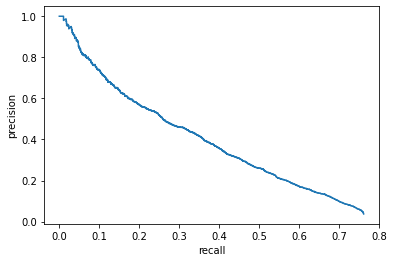

In [60]:
plt.plot(EVA_CN['Recall'], EVA_CN['Precision'])
plt.xlabel('recall')
plt.ylabel('precision')
tikzplotlib.save("plots/CN-trend.tex")
#plt.savefig('plots/CN-trend.png')

In [35]:
EVA_JC = EvalDF(jc_evaluation)
EVA_JC

,Precision,Recall
0,0.000000,0.000000
1,0.500000,0.000225
2,0.666667,0.000449
3,0.750000,0.000674
4,0.800000,0.000898
...,...,...
90553,0.037480,0.762012
90554,0.037480,0.762012
90555,0.037480,0.762012
90556,0.037479,0.762012


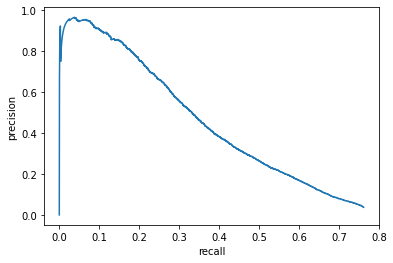

In [61]:
plt.plot(EVA_JC['Recall'], EVA_JC['Precision'])
plt.xlabel('recall')
plt.ylabel('precision')
tikzplotlib.save("plots/JC-trend.tex")
#plt.savefig('plots/jc-trend.png')
plt.show()

In [37]:
EVA_SR = EvalDF(sr_evaluation)
EVA_SR

,Precision,Recall
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
102068,0.033272,0.762461
102069,0.033271,0.762461
102070,0.033271,0.762461
102071,0.033271,0.762461


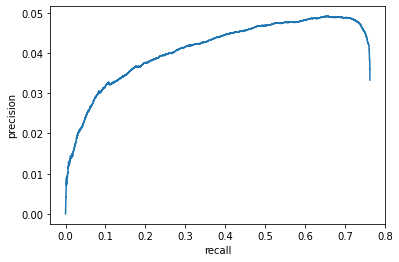

In [62]:
plt.plot(EVA_SR['Recall'], EVA_SR['Precision'])
plt.xlabel('recall')
plt.ylabel('precision')
tikzplotlib.save("plots/SR-trend.tex")
#plt.savefig('plots/sr-trend.png')

In [51]:
#function used to create dataframes that contain fallout and recall of each evaluation predictor
def EvaROC(eval_score):
    ev_fallout = []
    ev_rec = []
    for el in eval_score.fallout():
        ev_fallout.append(el)
    for el in eval_score.recall():
        ev_rec.append(el)

    df = pd.DataFrame(ev_fallout, columns=['Fallout'])

    rec_values = pd.Series(ev_rec)
    df.insert(loc=1, column='Recall', value=rec_values)

    return df

EvaROC_cn = EvaROC(cn_evaluation)
EvaROC_jc = EvaROC(jc_evaluation)
EvaROC_sr = EvaROC(sr_evaluation)
EvaROC_rnd = EvaROC(rnd_evaluation)

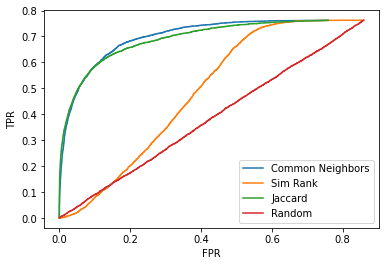

<Figure size 432x288 with 0 Axes>

In [53]:
plt.plot(EvaROC_cn['Fallout'], EvaROC_cn['Recall'], label="Common Neighbors")
plt.plot(EvaROC_sr['Fallout'], EvaROC_sr['Recall'], label="Sim Rank")
plt.plot(EvaROC_jc['Fallout'], EvaROC_jc['Recall'], label="Jaccard")
plt.plot(EvaROC_rnd['Fallout'], EvaROC_rnd['Recall'], label="Random")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()
tikzplotlib.save("plots/predictors2.tex")

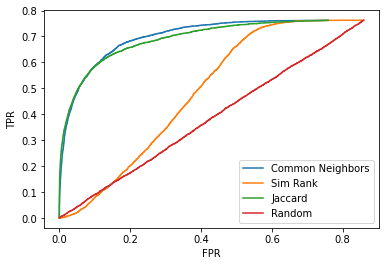

<Figure size 432x288 with 0 Axes>

In [65]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Common Neighbors")
plt.plot(sr_evaluation.fallout(), sr_evaluation.recall(), label="Sim Rank")
plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
plt.plot(rnd_evaluation.fallout(), rnd_evaluation.recall(), label="Random")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()
plt.show()
#tikzplotlib.save("plots/predictors.tex")
plt.savefig('plots/ROC1.jpeg')

In [41]:
from sklearn.metrics import auc

print("Area Under Roc Curve (AUROC)")
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")
print(f"Sim Rank: \t {auc(sr_evaluation.fallout(), sr_evaluation.recall())}")
print(f"Random: \t {auc(rnd_evaluation.fallout(), rnd_evaluation.recall())}")

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.5240437155030582
Jaccard: 	 0.5165661983306384
Sim Rank: 	 0.4131934991715366
Random: 	 0.32765276825777545
